In [39]:
from os import walk
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib
import matplotlib.pyplot as plt

def process_files(filepath):
    filenames = next(walk(filepath), (None, None, []))[2]  # [] if no file
    red_images = []
    green_images = []
    blue_images = []
    overall_label = filepath.split('/')[-2]
    print("Starting... ")
    for file in filenames:
        default_img = asarray(Image.open(filepath + file))

        for pixels in default_img: 
            for pixel in pixels:
                if(
                    (pixel[0] < 256 and pixel[0] > 200) and
                    (pixel[1] < 256 and pixel[1] > 200) and
                    (pixel[2] < 256 and pixel[2] > 200)):
                        pixel[0] = 0
                        pixel[1] = 0
                        pixel[2] = 0    
        
        red_channel_loop = default_img.copy()            
        blue_channel_loop = default_img.copy()
        green_channel_loop = default_img.copy()

        for pixels in red_channel_loop:
            for pixel in pixels:
                pixel[1] = 0
                pixel[2] = 0

        red_images.append(red_channel_loop)

        for pixels in green_channel_loop:
            for pixel in pixels:
                pixel[0] = 0
                pixel[2] = 0 

        green_images.append(green_channel_loop)

        for pixels in blue_channel_loop:
            for pixel in pixels:
                pixel[0] = 0
                pixel[1] = 0

        blue_images.append(blue_channel_loop)

        print("Image converted")
        
    print("Succes!")
    all_images = dict()
    all_images["Red " + overall_label] = red_images
    all_images["Green " + overall_label] = green_images
    all_images["Blue " + overall_label] = blue_images
    return all_images

Starting... 
Image converted
Image converted
Image converted
Succes!
{'Red Tomato 3': [array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
    

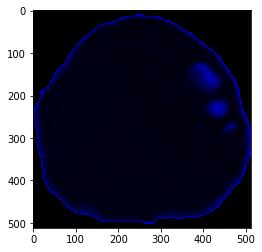

In [47]:
tomato3_path = '../Datasets/train/Tomato 3/'

images = process_files(tomato3_path)

images["Red Tomato 3"][0]

print(images)

# Plot the image
plt.imshow(images["Blue Tomato 3"][0], interpolation='nearest')